In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fineTech_appData_clean = pd.read_csv('D:\ML Project\clean_FineTech_appData.csv')

In [3]:
# plt.figure(figsize=(15,10))
# sns.heatmap(fineTech_appData_clean.corr(),annot=True,linewidths=2)

In [4]:
#Data preprocessing
#Split dataset in Train and Test

#fineTech_appData_clean = fineTech_appData
target =fineTech_appData_clean['enrolled']
fineTech_appData_clean.drop(columns = 'enrolled', inplace = True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fineTech_appData_clean, target, test_size = 0.2, random_state = 0)
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of y_test = ', y_test.shape)

('Shape of X_train = ', (40000, 49))
('Shape of X_test = ', (10000, 49))
('Shape of y_train = ', (40000L,))
('Shape of y_test = ', (10000L,))


In [5]:
train_userID = X_train['user']
X_train.drop(columns= 'user', inplace =True)
test_userID = X_test['user']
X_test.drop(columns= 'user', inplace =True)
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of train_userID = ', train_userID.shape)
print('Shape of test_userID = ', test_userID.shape)

('Shape of X_train = ', (40000, 48))
('Shape of X_test = ', (10000, 48))
('Shape of train_userID = ', (40000L,))
('Shape of test_userID = ', (10000L,))


C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [6]:
#Feature Scaling
#The multiple features in the different units so for the best accuracy need to convert all features in a single unit.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [7]:
# impoer required packages
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [8]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_score(y_test,y_pred_dt)

0.7003

In [9]:
dt_model2 = DecisionTreeClassifier()
dt_model2.fit(X_train_sc,y_train)
y_pred_dt_sc = dt_model2.predict(X_test_sc)
accuracy_score(y_test,y_pred_dt_sc)

0.6937

In [10]:
#K – Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
kc_model = KNeighborsClassifier()
kc_model.fit(X_train,y_train)
y_pred_kc =kc_model.predict(X_test)
accuracy_score(y_test,y_pred_kc)

0.6994

In [11]:
kc_model2 = KNeighborsClassifier()
kc_model2.fit(X_train_sc,y_train)
y_pred_kc_sc = kc_model2.predict(X_test_sc)
accuracy_score(y_test,y_pred_kc_sc)

0.7314

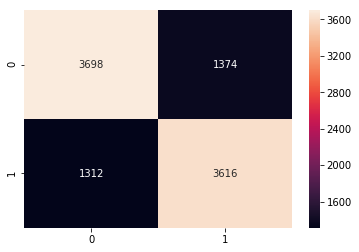

In [12]:
# confussion matrix
cm_kc_model = confusion_matrix(y_test,y_pred_kc_sc)
sns.heatmap(cm_kc_model,annot=True,fmt='g')

In [13]:
# Clasification Repor
print(classification_report(y_test,y_pred_kc_sc))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      5072
           1       0.72      0.73      0.73      4928

   micro avg       0.73      0.73      0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



In [14]:
#Cross-validation of the ML model
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = kc_model2, X = X_train_sc, y = y_train, cv = 10)
print("Cross validation of KNeighbors model = ",cross_validation)
print("Cross validation of KNeighbors model (in mean) = ",cross_validation.mean())

('Cross validation of KNeighbors model = ', array([0.73031742, 0.73156711, 0.734     , 0.73875   , 0.73125   ,
       0.73375   , 0.7325    , 0.73575   , 0.73993498, 0.73543386]))
('Cross validation of KNeighbors model (in mean) = ', 0.7343253371078335)


In [17]:
final_result = pd.concat([test_userID, y_test], axis = 1)
final_result['predicted result'] = y_pred_kc_sc
print(final_result)

         user  enrolled  predicted result
11841  239786         1                 1
19602  279644         1                 1
45519   98290         0                 0
25747  170150         1                 0
42642  237568         1                 1
31902   65042         1                 0
30346  207226         1                 1
12363  363062         0                 0
32490  152296         1                 1
26128   64484         0                 0
14227   38108         1                 1
26376  359940         0                 0
44173  136089         0                 0
12968   14231         1                 0
32104  216038         0                 0
17844   18918         1                 1
43460  316730         1                 1
8369    28308         1                 0
15055  228387         1                 1
6338    69640         1                 1
15301  358264         0                 0
46250  348059         0                 0
45580  178743         1           

In [18]:
#Save the ML model with Pickle
import pickle
# save model
pickle.dump(kc_model2, open('FineTech_app_ML_model.pickle', 'wb'))

In [19]:
# load model
ml_model_pl = pickle.load(open('FineTech_app_ML_model.pickle', 'rb'))

In [21]:
# predict the output
y_pred_pl = ml_model_pl.predict(X_test_sc)